# Numerical Integration
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

The purpose of numerical integration is to compute the area under a curve or a specified set of data points. The two general applications of numerical integration comprise the integration of (a) complex continuous functions, and (b) discrete data. Many times, the function to be integrated does not admit an antiderivative, such as $f(x) = e^{-x^2}$.

## Newton-Cotes Integration
The general idea behind Newton-Cotes Integration is to approximate the function using a polynomial and then integrating the polynomial.

### Left, Right, and Midpoint Rules
The left, right, and midpoint rules are the simplest of all numerical integration methods. They are based on approximating the function as a constant
\begin{equation}
\int_a^b f(x) \text{d}x \approx \int_a^b C \text{d}x = C\times(b-a)
\end{equation}
The constant can be chosen in several ways, the most common are
1. Left point rule: choose $C = f(a)$
2. Right point rule: choose $C = f(b)$
3. Midpoint rule: choose $C = f(\frac{a+b}{2})$

The three options are shown on the plots below.

In [11]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [12]:
def myf(x):
    return 1.0/np.sqrt(np.pi) * np.exp(-x**2)

(0.0, 0.5923990627251441)

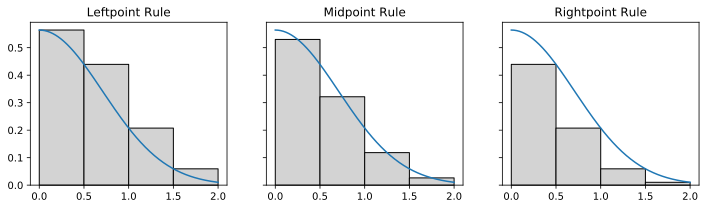

In [13]:
xalot = np.linspace(0,2,200)

npts = 5

x = np.linspace(0,2, npts)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_size_inches((12,3))
a = 0.5
b = 1.0

ax = ax1
ax.plot(xalot, myf(xalot))
ax.set_title('Leftpoint Rule')
# ax1.fill_between([a,b],[myf(a),myf(a)],  edgecolor='k', facecolor='lightgray',linewidth=1)
# plot left Riemann Sum
for i in range(0, len(x)-1):
    a = x[i]
    b = x[i+1]
    ax.fill_between([a,b],[myf(a),myf(a)],  edgecolor='k', facecolor='lightgray',linewidth=1)

ax = ax2
ax.plot(xalot, myf(xalot))
# ax3.fill_between([a,b],[myf( (a+b)/2) ,myf( (a+b)/2)],  edgecolor='k', facecolor='lightgray',linewidth=1)
# plot midpoint rule
ax.set_title('Midpoint Rule')
for i in range(0, len(x)-1):
    a = x[i]
    b = x[i+1]
    h = myf((a+b)/2)
    ax.fill_between([a,b],[h,h],edgecolor='k', facecolor='lightgray',linewidth=1)

ax = ax3
ax.plot(xalot, myf(xalot))
# ax2.fill_between([a,b],[myf(b),myf(b)],  edgecolor='k', facecolor='lightgray',linewidth=1)
# plot right Riemann Sum
ax.set_title('Rightpoint Rule')
for i in range(0, len(x)-1):
    a = x[i]
    b = x[i+1]
    ax.fill_between([a,b],[myf(b),myf(b)],  edgecolor='k', facecolor='lightgray',linewidth=1)

plt.ylim(bottom=0.0)

Here we define all three rules

In [14]:
def leftpoint(f, a, b, npts):
    '''
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    npts: Number of quadrature points
    
    Returns the integral of f(x) based on the leftpoint rule
    '''    
    x = np.linspace(a,b,npts)
    sum = 0.0
    for i in range(0,len(x)-1):
        a = x[i]
        b = x[i+1]
        sum += (b-a)*(f(a) )
    return sum

def rightpoint(f, a, b, npts):
    '''
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    npts: Number of quadrature points
    
    Returns the integral of f(x) based on the rightpoint rule
    '''
    x = np.linspace(a,b,npts)
    sum = 0.0
    for i in range(0,len(x)-1):
        a = x[i]
        b = x[i+1]
        sum += (b-a)*(f(b) )
    return sum


def midpoint(f, a, b, npts):
    '''
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    npts: Number of quadrature points
    
    Returns the integral of f(x) based on the midpoint rule
    '''
    x = np.linspace(a,b,npts)
    sum = 0.0
    for i in range(0,len(x)-1):
        a = x[i]
        b = x[i+1]
        sum += (b-a)*(f( (a+b)/2 ) )
    return sum

#### Example

Use the left, right, and midpoints rules to compute the integral 
\begin{equation}
\int_0^3 e^{-x^2} \text{d} x
\end{equation}
Compute the absolute relative approximate error for a set of integration points ranging from 2 to 200. Plot the error in all cases.

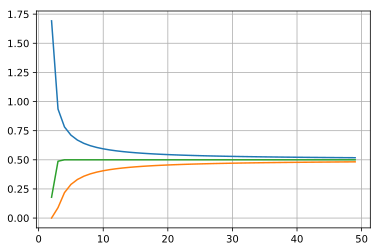

In [15]:
numpts = np.arange(2,50)
a = 0.0
b = 3.0

lpvals = []
rpvals = []
mpvals = []
for npts in numpts:
    v = leftpoint(myf,a,b,npts)     
    lpvals.append(v)
    v = rightpoint(myf,a,b,npts)
    rpvals.append(v)
    v = midpoint(myf,a,b,npts)
    mpvals.append(v)
    
plt.plot(numpts,lpvals, numpts,rpvals, numpts, mpvals)
plt.grid()

Now let's look at how the absolute approximate relative error behaves

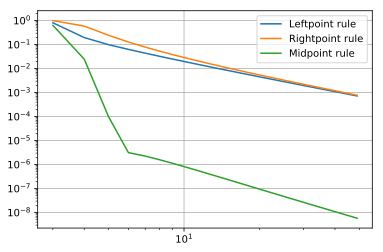

In [16]:
lpvals = np.array(lpvals)
e1 =abs( (lpvals[1:] - lpvals[:-1])/lpvals[1:] )
plt.loglog(numpts[1:],e1, label="Leftpoint rule")

rpvals = np.array(rpvals)
e2 =abs( (rpvals[1:] - rpvals[:-1])/rpvals[1:])
plt.loglog(numpts[1:],e2, label="Rightpoint rule" )

mpvals = np.array(mpvals)
e3 =abs( (mpvals[1:] - mpvals[:-1])/mpvals[1:])
plt.loglog(numpts[1:],e3, label="Midpoint rule" )

plt.grid()
plt.legend()

### Trapezoid Rule

The trapezoidal rule fits a straight line between each two points. It is given by the formula
\begin{equation}
\int_a^b f(x) \text{d} x \approx \frac{b-a}{2}[f(a) + f(b)]
\end{equation}

(0.0, 0.5923990627251441)

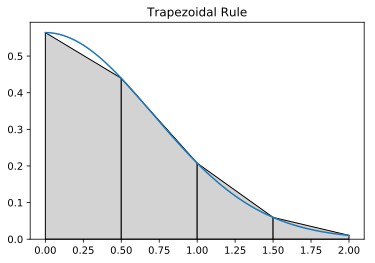

In [26]:
def myf(x):
    return 1.0/np.sqrt(np.pi) * np.exp(-x**2)

xalot = np.linspace(0,2,200)

npts = 5

x = np.linspace(0,2, npts)

plt.plot(xalot, myf(xalot))
plt.title('Trapezoidal Rule')
# ax1.fill_between([a,b],[myf(a),myf(a)],  edgecolor='k', facecolor='lightgray',linewidth=1)
# plot left Riemann Sum
for i in range(0, len(x)-1):
    a = x[i]
    b = x[i+1]
    plt.fill_between([a,b],[myf(a),myf(b)],  edgecolor='k', facecolor='lightgray',linewidth=1)

plt.ylim(bottom=0.0)

Implementation of the Trapezoidal rule is straightforward as shown below. In this case, we will implement the trapezoidal rule for both continuous functions and for discrete datasets.

In [32]:
def traprule(x,y):
    '''
    Integrates a discrete set of data using the Trapezoidal rule.
    
    x: Values of the independent variable
    y: Values of the dependent variable
    
    Returns the integral of f(x) based on the midpoint rule
    '''

    sum = 0.0
    for i in range(0,len(x)-1):
        sum += 0.5*(x[i+1]-x[i])*(y[i+1] + y[i])
    return sum


def traprulef(f, a, b, npts):
    '''
    Computes the integral of f(x) using the Trapezoidal rule. 
    
    f: Any Python function
    a: Lower integral bound
    b: Upper integral bound
    npts: Number of quadrature points
    
    Returns the integral of f(x) based on the midpoint rule
    '''    
    x = np.linspace(a,b,npts)
    sum = 0.0
    for i in range(0,len(x)-1):
        a = x[i]
        b = x[i+1]
        sum += 0.5*(b-a)*(f(a) + f(b))
    return sum

#### Example
Use the Trapezoidal rule to compute the integral 
\begin{equation}
\int_0^3 e^{-x^2} \text{d} x
\end{equation}
Compute the absolute relative approximate error for a set of integration points ranging from 2 to 200. Plot the error.

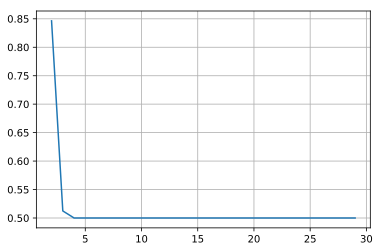

In [40]:
numpts = np.arange(2,30)
a = 0.0
b = 3.0

trapvals = []
for npts in numpts:
    v = traprulef(myf,a,b,npts)     
    trapvals.append(v)
    
plt.plot(numpts,trapvals)
plt.grid()

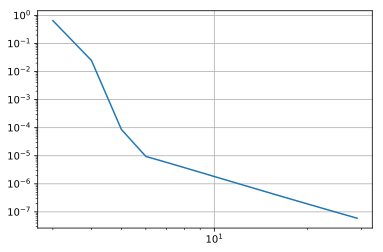

In [43]:
trapvals = np.array(trapvals)
e1 =abs( (trapvals[1:] - trapvals[:-1])/trapvals[1:] )
plt.loglog(numpts[1:],e1, label="Trapezoidal rule")
plt.grid()

In [42]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()